# Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 50

# Read Data

In [4]:
# lets read the dataset
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# lets check the shape
print(data.shape)

(5043, 28)


In [6]:
# lets check the column wise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
# check duplicated data
data.duplicated().sum()

# drop duplicates
data = data.drop_duplicates()

In [9]:
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [10]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

# EDA

In [12]:
eda = data.copy()
eda = data.dropna()

In [13]:
eda['title_year'] = eda['title_year'].astype(int)

### Top 10 Movies with Highest IMBD Score 

In [14]:
top10_imdb = eda.sort_values(by='imdb_score', ascending=False)
top10_imdb = top10_imdb[['movie_title','title_year', 'genres', 'director_name', 'imdb_score']].reset_index(drop=True)
top10_imdb = top10_imdb.head(10)
top10_imdb

,movie_title,title_year,genres,director_name,imdb_score
0,The Shawshank Redemption,1994,Crime|Drama,Frank Darabont,9.3
1,The Godfather,1972,Crime|Drama,Francis Ford Coppola,9.2
2,The Dark Knight,2008,Action|Crime|Drama|Thriller,Christopher Nolan,9.0
3,The Godfather: Part II,1974,Crime|Drama,Francis Ford Coppola,9.0
4,"The Good, the Bad and the Ugly",1966,Western,Sergio Leone,8.9
5,The Lord of the Rings: The Return of the King,2003,Action|Adventure|Drama|Fantasy,Peter Jackson,8.9
6,Pulp Fiction,1994,Crime|Drama,Quentin Tarantino,8.9
7,Schindler's List,1993,Biography|Drama|History,Steven Spielberg,8.9
8,Star Wars: Episode V - The Empire Strikes Back,1980,Action|Adventure|Fantasy|Sci-Fi,Irvin Kershner,8.8
9,Fight Club,1999,Drama,David Fincher,8.8


Text(0.5, 1.0, 'Top 10 Movies with Highest IMBD Score')

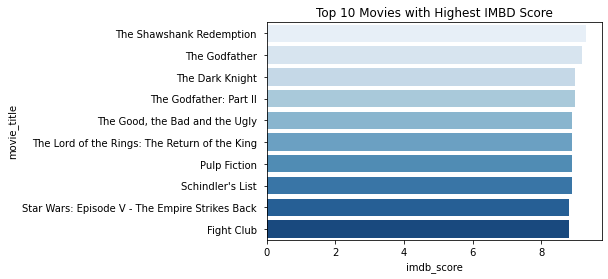

In [15]:
sns.barplot(y='movie_title', x='imdb_score', data=top10_imdb, palette='Blues')
plt.title('Top 10 Movies with Highest IMBD Score', fontsize=12)

### Top 10 Movie with Highest Profit 

In [16]:
eda['profit'] = eda['gross'] - eda['budget']

# convert proft to milion
eda['profit'] = round(eda['profit']/1000000,2)
top10profit = eda[['profit', 'movie_title','title_year', 'director_name']].sort_values(by='profit', ascending=False).reset_index(drop=True).head(10)


top10profit

,profit,movie_title,title_year,director_name
0,523.51,Avatar,2009,James Cameron
1,502.18,Jurassic World,2015,Colin Trevorrow
2,458.67,Titanic,1997,James Cameron
3,449.94,Star Wars: Episode IV - A New Hope,1977,George Lucas
4,424.45,E.T. the Extra-Terrestrial,1982,Steven Spielberg
5,403.28,The Avengers,2012,Joss Whedon
6,377.78,The Lion King,1994,Roger Allers
7,359.54,Star Wars: Episode I - The Phantom Menace,1999,George Lucas
8,348.32,The Dark Knight,2008,Christopher Nolan
9,330.00,The Hunger Games,2012,Gary Ross


Text(0.5, 1.0, 'Top 10 Movie with Highest Profit')

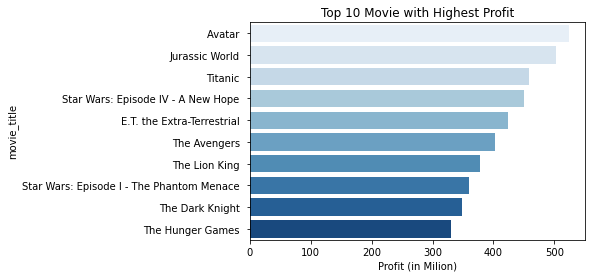

In [17]:
sns.barplot(x='profit', y='movie_title', data=top10profit, palette='Blues')
plt.xlabel('Profit (in Milion)')
plt.title('Top 10 Movie with Highest Profit', fontsize=12)

### Top 10 Movies with Highest Loss

In [18]:
loss = eda[['profit', 'movie_title', 'title_year', 'director_name']].sort_values(by='profit', ascending=True).reset_index(drop=True).head(10)
loss['profit'] = round(loss['profit']/1000,2)  #convert to bilion
loss = loss.sort_values(by='profit', ascending=False)
loss

,profit,movie_title,title_year,director_name
9,-0.55,Red Cliff,2008,John Woo
7,-0.70,Tango,1998,Carlos Saura
8,-0.70,Kabhi Alvida Naa Kehna,2006,Karan Johar
6,-0.99,Godzilla 2000,1999,Takao Okawara
5,-1.10,Akira,1988,Katsuhiro Ôtomo
4,-2.13,Steamboy,2004,Katsuhiro Ôtomo
3,-2.40,Princess Mononoke,1997,Hayao Miyazaki
2,-2.50,Fateless,2005,Lajos Koltai
1,-4.20,Lady Vengeance,2005,Chan-wook Park
0,-12.21,The Host,2006,Joon-ho Bong


Text(0.5, 1.0, 'Top 10 Movies with Highest Loss')

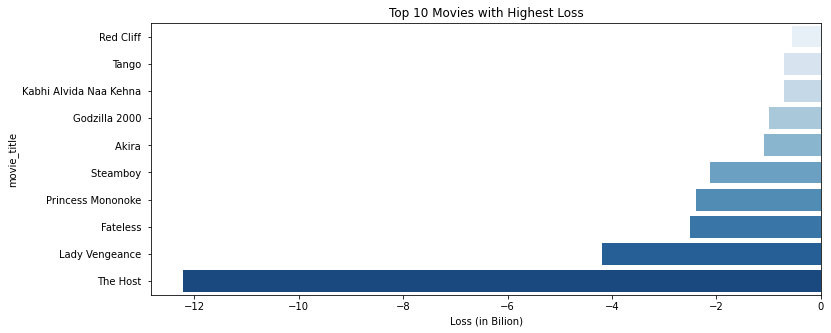

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='profit', y='movie_title', data=loss, palette='Blues')
plt.xlabel('Loss (in Bilion)')
plt.title('Top 10 Movies with Highest Loss', fontsize=12)

### Top 10 Movies with Highest Gross

In [20]:
eda['gross'] = round(eda['gross']/1000000,2)
top10gross = eda[['gross', 'movie_title', 'title_year']].sort_values(by='gross', ascending=False).reset_index(drop=True).head(10)

<AxesSubplot:xlabel='gross', ylabel='movie_title'>

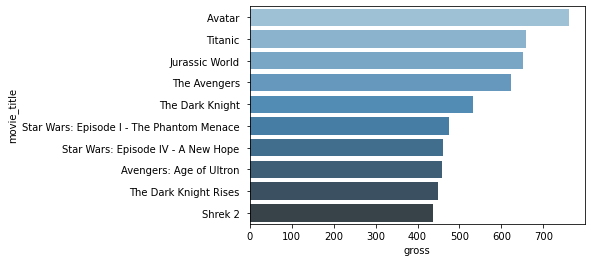

In [21]:
sns.barplot(x='gross', y='movie_title', data=top10gross, palette='Blues_d')

### Movie Comparison by Language

In [22]:
eda['language'].value_counts()

English       3566
French          34
Spanish         23
Mandarin        14
German          10
Japanese        10
Cantonese        7
Italian          7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Mongolian        1
None             1
Romanian         1
Vietnamese       1
Arabic           1
Hebrew           1
Zulu             1
Czech            1
Russian          1
Filipino         1
Maya             1
Kazakh           1
Hungarian        1
Aramaic          1
Bosnian          1
Name: language, dtype: int64

##### Count

In [23]:
eda['languages'] = np.where(eda['language'] == 'English', 'English', 'Foreign')
eda['languages'].value_counts()

English    3566
Foreign     157
Name: languages, dtype: int64

##### Profit

In [24]:
# group by languages and sum profit
eda.groupby('languages').agg(proft_sum=('profit','sum'), profit_mean=('profit','mean')).reset_index()

,languages,proft_sum,profit_mean
0,English,52912.17,14.837961
1,Foreign,-29644.07,-188.815732


##### Gross

In [25]:
# group by languages and sum gross
gross_lang = eda.groupby('languages').agg(gross_sum=('gross','sum'), gross_mean=('gross','mean')).reset_index()
gross_lang

,languages,gross_sum,gross_mean
0,English,194322.37,54.493093
1,Foreign,1061.90,6.763694


##### imdb

In [26]:
imdb_lang = eda.groupby('languages').agg(imdb=('imdb_score','mean')).reset_index()
imdb_lang

,languages,imdb
0,English,6.427510
1,Foreign,7.332484


### Duration

In [27]:
data['duration'].describe()

count    4983.000000
mean      107.213325
std        25.248775
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [28]:
def duration(x, quantile):
    q1, q3 = quantile
    try:
        if x >= q3:
            return 'long'
        elif x >= q1:
            return 'medium'
        else:
            return 'short'
    except exception:
        return 'Unknown'

eda['duration_type'] = eda['duration'].apply(lambda x: duration(x, eda['duration'].quantile([0.33, 0.66])))

##### Count

In [29]:
eda['duration_type'].value_counts()

long      1294
medium    1235
short     1194
Name: duration_type, dtype: int64

##### Profit

In [30]:
profit_duration = eda.groupby('duration_type').agg(profit_sum=('profit','sum'), profit_mean=('profit','mean')).reset_index()
profit_duration

,duration_type,profit_sum,profit_mean
0,long,17406.10,13.451391
1,medium,-8243.69,-6.675053
2,short,14105.69,11.813811


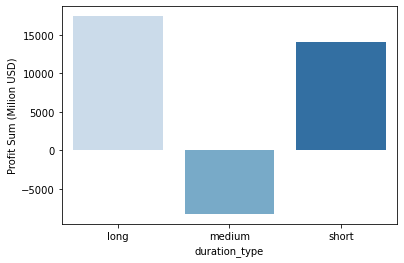

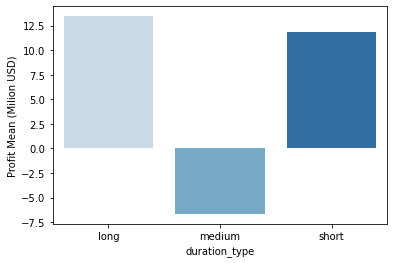

In [31]:
sns.barplot(x='duration_type', y='profit_sum', data=profit_duration, palette='Blues')
plt.ylabel('Profit Sum (Milion USD)')
plt.show()

sns.barplot(x='duration_type', y='profit_mean', data=profit_duration, palette='Blues')
plt.ylabel('Profit Mean (Milion USD)')
plt.show()

##### Gross

In [32]:
gross_duration = eda.groupby('duration_type').agg(gross_sum=('gross','sum'), gross_mean=('gross','mean')).reset_index()
gross_duration

,duration_type,gross_sum,gross_mean
0,long,96354.17,74.462264
1,medium,52231.09,42.292381
2,short,46799.01,39.195151


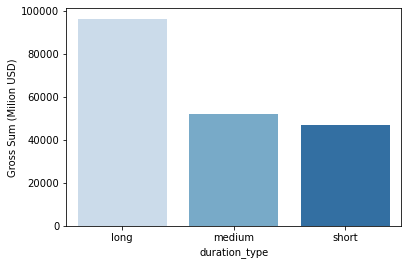

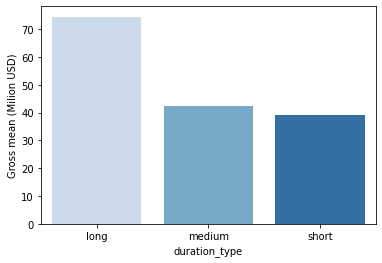

In [33]:
sns.barplot(x='duration_type', y='gross_sum', data=gross_duration, palette='Blues')
plt.ylabel('Gross Sum (Milion USD)')
plt.show()

sns.barplot(x='duration_type', y='gross_mean', data=gross_duration, palette='Blues')
plt.ylabel('Gross mean (Milion USD)')
plt.show()

##### Imdb

In [34]:
imdb_duration = eda.groupby('duration_type').agg(imdb=('imdb_score','mean')).reset_index()
imdb_duration

,duration_type,imdb
0,long,6.940185
1,medium,6.394737
2,short,6.024791


### IMDB popularity & review

In [35]:
eda[['movie_title', 'num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews']].head(5)

,movie_title,num_critic_for_reviews,num_voted_users,num_user_for_reviews
0,Avatar,723.0,886204,3054.0
1,Pirates of the Caribbean: At World's End,302.0,471220,1238.0
2,Spectre,602.0,275868,994.0
3,The Dark Knight Rises,813.0,1144337,2701.0
5,John Carter,462.0,212204,738.0


### Top 10 Movies with the Highest Critic Review

In [36]:
eda['percent_critic'] = eda['num_critic_for_reviews']/eda['num_user_for_reviews']*100
eda['percent_critic'] = eda['percent_critic'].astype(int)

eda_critic = eda[['movie_title', 'percent_critic']].sort_values(by='percent_critic', ascending=False).reset_index(drop=True)
# we should filter percent < 100, we think that it's not possible if num_critic_for_reviews > num_user_review 
eda_critic = eda_critic[eda_critic['percent_critic'] <= 100].reset_index(drop=True)
eda_critic.head(10)

,movie_title,percent_critic
0,Love in the Time of Cholera,100
1,The Life Before Her Eyes,100
2,Project Almanac,100
3,"I Love You, Man",100
4,The Funeral,100
5,The Man from U.N.C.L.E.,100
6,The Judge,100
7,The Longest Ride,100
8,Hugo,100
9,The Dictator,100


In [37]:
eda['critic'] = np.where(eda['percent_critic'] <= 10, 1,
                       np.where((eda['percent_critic']>10) & (eda['percent_critic']<=20),2,
                       np.where((eda['percent_critic']>20) & (eda['percent_critic']<=30),3,
                       np.where((eda['percent_critic']>30) & (eda['percent_critic']<=40),4,
                       np.where((eda['percent_critic']>40) & (eda['percent_critic']<=50),5,
                       np.where((eda['percent_critic']>50) & (eda['percent_critic']<=60),6,
                       np.where((eda['percent_critic']>60) & (eda['percent_critic']<=70),7,
                       np.where((eda['percent_critic']>70) & (eda['percent_critic']<=80),8,
                       np.where((eda['percent_critic']>80) & (eda['percent_critic']<=90),9,10
                       )))))))))

In [38]:
eda_binned = eda[eda['percent_critic']<=100].reset_index(drop=True)
eda_binned.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,languages,duration_type,percent_critic,critic
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000,523.51,English,long,23,3
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0,9.40,English,long,24,3
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000,-44.93,English,long,60,6
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000,198.13,English,long,30,3
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000,-190.64,English,long,62,7


##### Count

In [39]:
critic_binned = eda_binned.groupby('critic').agg(count=('critic','count')).reset_index()
critic_binned

,critic,count
0,1,30
1,2,184
2,3,396
3,4,527
4,5,429
5,6,363
6,7,284
7,8,251
8,9,167
9,10,169


<AxesSubplot:xlabel='critic', ylabel='count'>

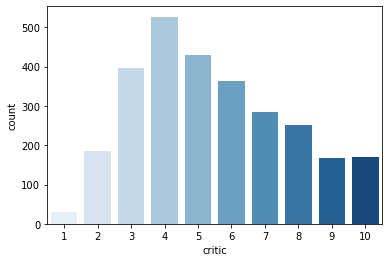

In [40]:
sns.barplot(x='critic', y='count', data=critic_binned, palette='Blues')

##### Gross

In [41]:
critic_gross = eda_binned.groupby('critic').agg(gross_sum=('gross','sum'), gross_mean=('gross','mean')).reset_index()
critic_gross

,critic,gross_sum,gross_mean
0,1,4156.17,138.539000
1,2,17256.16,93.783478
2,3,28988.79,73.204015
3,4,30323.32,57.539507
4,5,25577.81,59.621935
5,6,18951.56,52.208154
6,7,14722.73,51.840599
7,8,10119.12,40.315219
8,9,7151.11,42.821018
9,10,8073.10,47.769822


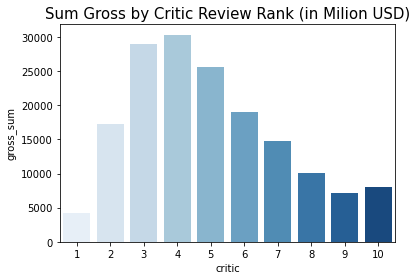

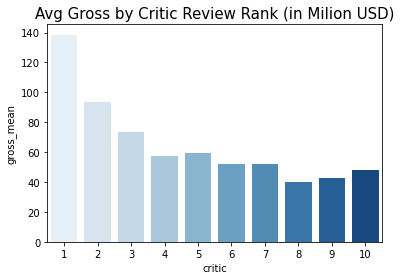

In [42]:
sns.barplot(x='critic', y='gross_sum', data=critic_gross, palette='Blues')
plt.title('Sum Gross by Critic Review Rank (in Milion USD)', fontsize=15)
plt.show()

sns.barplot(x='critic', y='gross_mean', data=critic_gross, palette='Blues')
plt.title('Avg Gross by Critic Review Rank (in Milion USD)', fontsize=15)
plt.show()

##### Profit

In [43]:
prof = eda_binned.groupby('critic').agg(profit_sum=('profit','sum'), profit_mean=('profit','mean')).reset_index()
prof

,critic,profit_sum,profit_mean
0,1,1887.68,62.922667
1,2,6337.89,34.445054
2,3,10331.51,26.089672
3,4,9328.20,17.700569
4,5,8553.65,19.938578
5,6,3625.88,9.988650
6,7,2057.24,7.243803
7,8,446.29,1.778048
8,9,-100.03,-0.598982
9,10,1007.10,5.959172


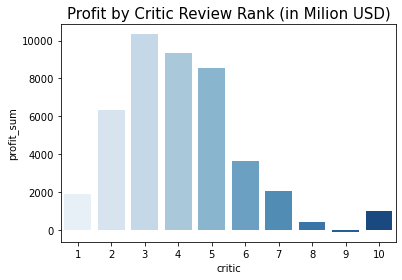

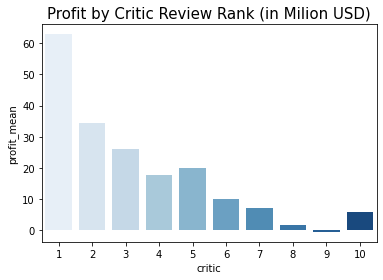

In [44]:
sns.barplot(x='critic', y='profit_sum', data=prof, palette='Blues')
plt.title('Profit by Critic Review Rank (in Milion USD)', fontsize=15)
plt.show()

sns.barplot(x='critic', y='profit_mean', data=prof, palette='Blues')
plt.title('Profit by Critic Review Rank (in Milion USD)', fontsize=15)
plt.show()

##### IMDB score

In [45]:
critic_imdb = eda_binned.groupby('critic').agg(imdb=('imdb_score','mean')).reset_index()
critic_imdb

,critic,imdb
0,1,7.423333
1,2,6.783152
2,3,6.697980
3,4,6.493928
4,5,6.423077
5,6,6.332507
6,7,6.309507
7,8,6.398406
8,9,6.479641
9,10,6.444379


Text(0.5, 1.0, 'IMDB score by Critic Review Rank')

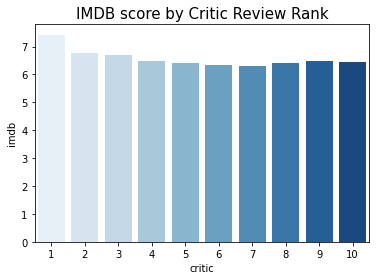

In [46]:
sns.barplot(x='critic', y='imdb', data=critic_imdb, palette='Blues')
plt.title('IMDB score by Critic Review Rank', fontsize=15)

### Genres

In [47]:
eda['genres'].value_counts()

Comedy|Drama|Romance                     147
Drama                                    140
Comedy|Drama                             137
Comedy                                   137
Comedy|Romance                           131
                                        ... 
Action|Thriller|Western                    1
Action|Family|Fantasy|Musical              1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64

In [48]:
eda['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [49]:
eda['genre'] = eda['genres'].str.split('|')
eda['genre1'] = eda['genre'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
eda['genre2'] = eda['genre'].apply(lambda x: x[1] if len(x) > 1 else x[0])
eda['genre3'] = eda['genre'].apply(lambda x: x[2] if len(x) > 2 else x[0])
eda['genre4'] = eda['genre'].apply(lambda x: x[3] if len(x) > 3 else x[0])
eda['genre5'] = eda['genre'].apply(lambda x: x[5] if len(x) > 5 else x[0])

eda[['genres', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5']].head(5)

,genres,genre1,genre2,genre3,genre4,genre5
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi,Action
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action,Action
3,Action|Thriller,Action,Thriller,Action,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action,Action


In [50]:
eda.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,languages,duration_type,percent_critic,critic,genre,genre1,genre2,genre3,genre4,genre5
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000,523.51,English,long,23,3,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0,9.40,English,long,24,3,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000,-44.93,English,long,60,6,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000,198.13,English,long,30,3,"[Action, Thriller]",Action,Thriller,Action,Action,Action
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000,-190.64,English,long,62,7,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action,Action


##### Count

In [51]:
gen = eda.groupby('genre1').agg(count=('genre1','count')).reset_index()
gen

,genre1,count
0,Action,951
1,Adventure,366
2,Animation,45
3,Biography,204
4,Comedy,984
5,Crime,253
6,Documentary,26
7,Drama,659
8,Family,3
9,Fantasy,37


<AxesSubplot:xlabel='count', ylabel='genre1'>

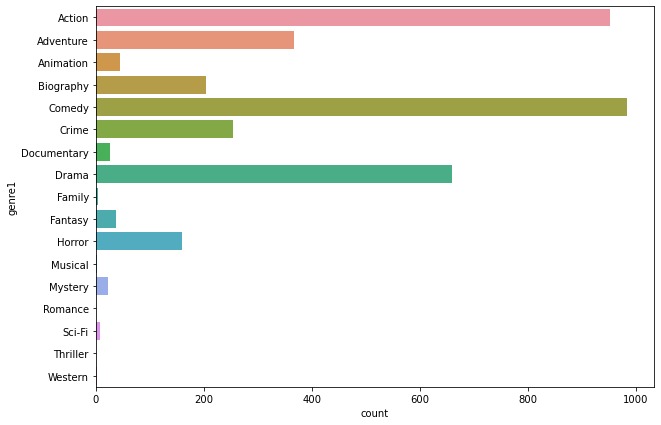

In [52]:
plt.figure(figsize=(10,7))
sns.barplot(x='count', y='genre1', data=gen)

##### Gross

In [53]:
gross_genre = eda.groupby('genre1').agg(gross_sum=('gross','sum'),gross_mean=('gross','mean')).reset_index()
gross_genre

,genre1,gross_sum,gross_mean
0,Action,73573.83,77.364700
1,Adventure,32585.54,89.031530
2,Animation,4057.77,90.172667
3,Biography,7434.08,36.441569
4,Comedy,38588.87,39.216331
5,Crime,8310.37,32.847312
6,Documentary,529.70,20.373077
7,Drama,21191.50,32.157056
8,Family,447.48,149.160000
9,Fantasy,1497.85,40.482432


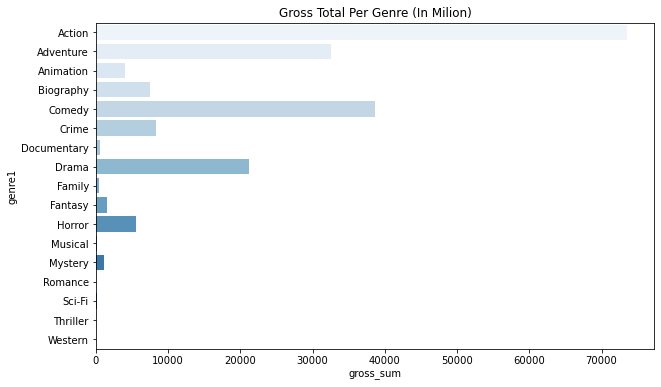

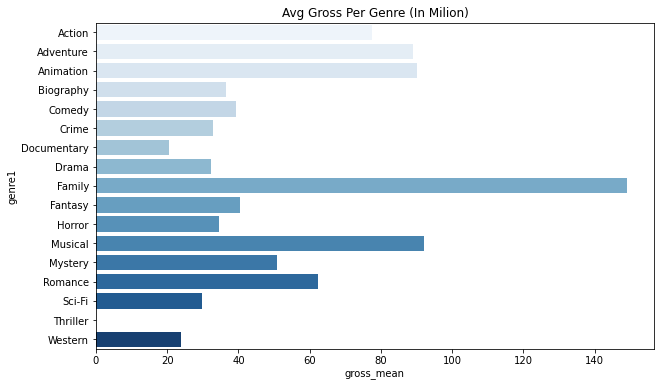

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='gross_sum', y='genre1', data=gross_genre, palette='Blues')
plt.title('Gross Total Per Genre (In Milion)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='gross_mean', y='genre1', data=gross_genre, palette='Blues')
plt.title('Avg Gross Per Genre (In Milion)')
plt.show()

##### Profit

In [55]:
profit_genre = eda.groupby('genre1').agg(profit_sum=('profit','sum'),profit_mean=('profit','mean')).reset_index()
profit_genre

,genre1,profit_sum,profit_mean
0,Action,5493.50,5.776551
1,Adventure,6383.56,17.441421
2,Animation,1514.32,33.651556
3,Biography,2213.04,10.848235
4,Comedy,3132.06,3.182988
5,Crime,-2377.36,-9.396680
6,Documentary,334.10,12.850000
7,Drama,1356.66,2.058665
8,Family,402.98,134.326667
9,Fantasy,899.85,24.320270


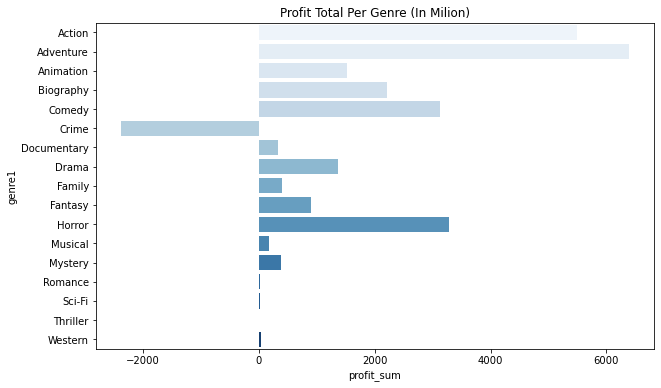

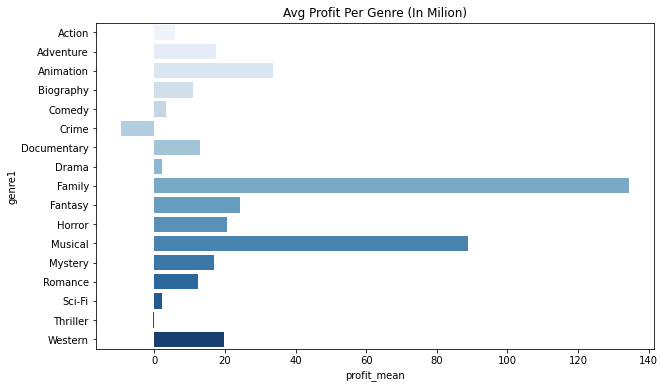

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='profit_sum', y='genre1', data=profit_genre, palette='Blues')
plt.title('Profit Total Per Genre (In Milion)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='profit_mean', y='genre1', data=profit_genre, palette='Blues')
plt.title('Avg Profit Per Genre (In Milion)')
plt.show()

##### IMDB

In [57]:
imdb_genre = eda.groupby('genre1').agg(imdb_score=('imdb_score','mean')).reset_index()
imdb_genre

,genre1,imdb_score
0,Action,6.289905
1,Adventure,6.558470
2,Animation,6.740000
3,Biography,7.158824
4,Comedy,6.169004
5,Crime,6.936364
6,Documentary,6.796154
7,Drama,6.831866
8,Family,6.500000
9,Fantasy,6.281081


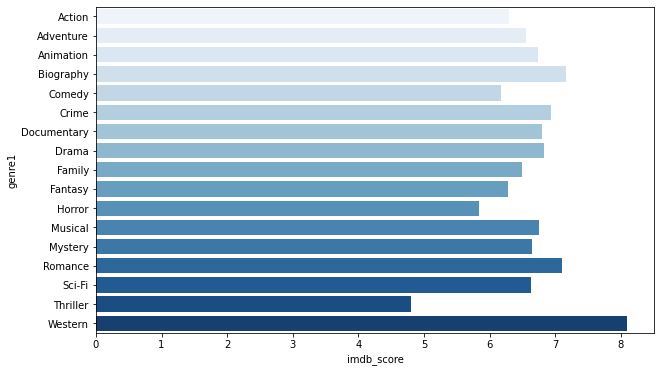

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='imdb_score', y='genre1', data=imdb_genre, palette='Blues')
plt.show()

In [134]:
data.dropna(inplace = True)
data['title_year'] = data['title_year'].astype(int)
data['title_year'].dtypes

dtype('int64')

# Recommending Movies based on Languages

In [125]:
pd.set_option('max_rows', 30)
@interact

def lang(Language = list(eda['language'].value_counts().index)):
    return eda.loc[(eda['language'] == Language)].head(10)[['movie_title', 'imdb_score']
                                                          ].sort_values(by='imdb_score', ascending=False).reset_index(drop=True)

interactive(children=(Dropdown(description='Language', options=('English', 'French', 'Spanish', 'Mandarin', 'G…

Text(0.5, 1.0, 'This function above will be shown like this :')

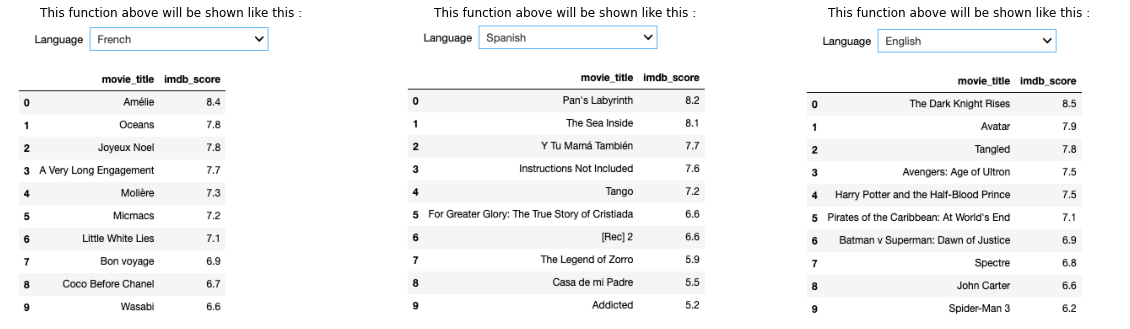

In [131]:
from matplotlib import image

# create figure
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 3

# images
img1 = image.imread('French.png')
img2 = image.imread('Spanish.png')
img3 = image.imread('English.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img3)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Recommending Movies Based on Directors

In [143]:
pd.set_option('max_rows', 150)
pd.set_option('max_colwidth', 150)
@interact

def director(Director = list(data['director_name'].value_counts().index)):
    return data.loc[(data['director_name'] == Director)][
        ['movie_title','title_year', 'imdb_score']].sort_values(by='imdb_score', 
                                                                ascending=False).head(10).reset_index(drop=True)

interactive(children=(Dropdown(description='Director', options=('Steven Spielberg', 'Clint Eastwood', 'Woody A…

Text(0.5, 1.0, 'This function above will be shown like this :')

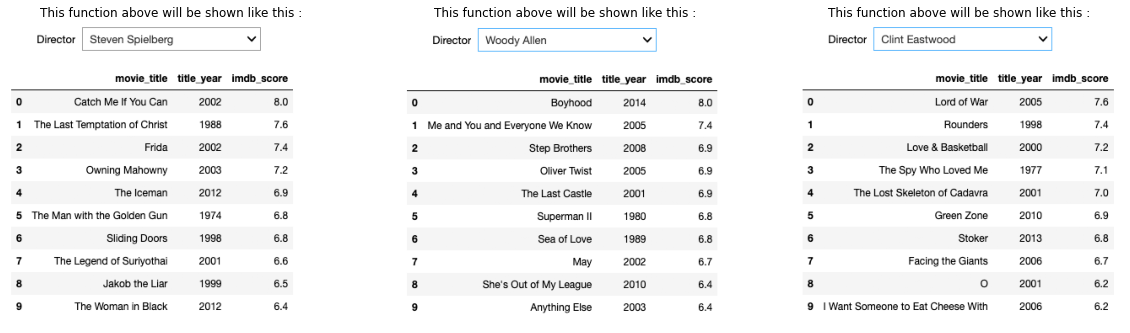

In [144]:
from matplotlib import image

# create figure
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 3

# images
img1 = image.imread('Steven.png')
img2 = image.imread('Woody.png')
img3 = image.imread('Clint.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img3)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Recommending Movies Based on Actors

In [ ]:
pd.set_option('max_rows', 150)
pd.set_option('max_colwidth', 150)
@interact

def check(City = list(df['joblocation_address'].value_counts().index),
          Industry = list(df['industry'].value_counts().index),
          Experience = list(df['experience_min'].value_counts().sort_values(ascending = False).index),
          Vacancies = 10
          ):
    return df.loc[(df['numberofpositions'] > Vacancies)
                   & (df['joblocation_address'] == City)
                   & (df['industry'] == Industry)
                   & (df['experience_min'] == Experience)][[
                                                      'company',
                                                      'jobtitle',
                                                      'education',
                                                      'payrate',
                                                      'numberofpositions',
                                                      ]]

In [145]:
pd.set_option('max_rows', 150)
@interact

def actor(Actor = list(data['actor_1_name'].value_counts().index)):
    data['actor1'] = data['actor_1_name']
    data['actor2'] = data['actor_2_name']
    data['actor3'] = data['actor_3_name']
    data['actor'] = data['actor1'].append(data['actor2'], ignore_index=True)
    data['actor'] = data['actor'].append(data['actor3'], ignore_index=True)
    return data.loc[(data['actor'] == Actor)].head(10)[['movie_title','title_year','imdb_score']
                                                      ].sort_values(by='imdb_score', ascending=False).reset_index(drop=True).head(10)

interactive(children=(Dropdown(description='Actor', options=('Robert De Niro', 'Johnny Depp', 'Denzel Washingt…

Text(0.5, 1.0, 'This function above will be shown like this :')

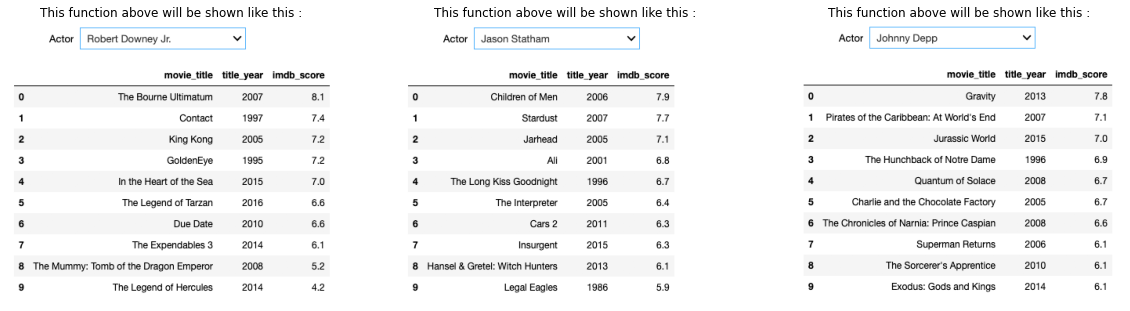

In [147]:
from matplotlib import image

# create figure
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 3

# images
img1 = image.imread('RJD.png')
img2 = image.imread('JS.png')
img3 = image.imread('JD.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img3)
plt.axis('off')
plt.title('This function above will be shown like this :')

# Recommending similar Movies

In [161]:
# lets read the dataset
df = pd.read_csv('movie_metadata.csv')

In [162]:
from mlxtend.preprocessing import TransactionEncoder

x = df['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')

# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', df['movie_title'])

# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Star Wars: Episode VII - The Force Awakens,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,Star Wars: Episode VII - The Force Awakens,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,The Avengers,Pirates of the Caribbean: On Stranger Tides,Men in Black 3,The Hobbit: The Battle of the Five Armies,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,...,Flywheel,Exeter,The Ridges,The Puffy Chair,Stories of Our Lives,Breaking Upwards,All Superheroes Must Die,Pink Flamingos,Clean,The Circle,Tin Can Man,The Cure,On the Downlow,Sanctuary; Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,The Mongol King,Newlyweds,Signed Sealed Delivered,The Following,A Plague So Pleasant,Shanghai Calling,My Date with Drew
Action,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Adventure,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [ ]:
pd.set_option('max_rows', 150)
pd.set_option('max_colwidth', 150)
@interact

def director(Director = list(data['director_name'].value_counts().index)):
    return data.loc[(data['director_name'] == Director)][
        ['movie_title','title_year', 'imdb_score']].sort_values(by='imdb_score', 
                                                                ascending=False).head(10).reset_index(drop=True)

In [171]:
pd.set_option('max_rows', 150)
pd.set_option('max_colwidth', 150)
@interact

def rec_mov(List_Movies=list(data['movie_title'].sort_values().values)):
    return data.loc[(data['movie_title'] == List_Movies)][
        ['movie_title','title_year', 'imdb_score']].sort_values(by='movie_title', ascending=True).reset_index(drop=True)

interactive(children=(Dropdown(description='List_Movies', options=('10 Cloverfield Lane\xa0', '10 Things I Hat…

In [164]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [165]:
# lets test on some results
recommendation_movie('Pacific Rim')

movie_title
Battlefield Earth                       1.0
Beneath the Planet of the Apes          1.0
The Time Machine                        1.0
Iron Man 2                              1.0
The Avengers                            1.0
Transformers: Revenge of the Fallen     1.0
Transformers: Age of Extinction         1.0
Fantastic Four                          1.0
TRON: Legacy                            1.0
Green Lantern                           1.0
Edge of Tomorrow                        1.0
Terminator Salvation                    1.0
Logan's Run                             1.0
Wing Commander                          1.0
The Fifth Element                       1.0
Star Trek Into Darkness                 1.0
Flash Gordon                            1.0
X-Men                                   1.0
Pacific Rim                             1.0
Transformers: Dark of the Moon          1.0
dtype: float64

In [157]:
# lets test on some results
recommendation_movie('Captain America: Civil War')

movie_title
Autumn in New York                                     1.0
Kung Fu Panda 3                                        1.0
The Other Woman                                        1.0
NaN                                                    1.0
Return to Me                                           1.0
The Mummy: Tomb of the Dragon Emperor                  1.0
Johnny English Reborn                                  1.0
A View to a Kill                                       1.0
The Adventures of Pluto Nash                           1.0
Baby's Day Out                                         1.0
Batman Begins                                          1.0
I Am Love                                              1.0
Indiana Jones and the Kingdom of the Crystal Skull     1.0
Me, Myself & Irene                                     1.0
Muppets Most Wanted                                    1.0
Independence Day: Resurgence                           1.0
The Karate Kid                              

## How It Works?

### STEP 1

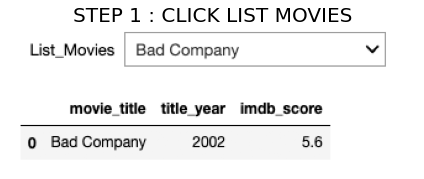

In [177]:
img1 = image.imread('1.png')
plt.imshow(img1)
plt.axis('off')
plt.title('STEP 1 : CLICK LIST MOVIES', fontsize=20)
plt.tight_layout()

### STEP 2

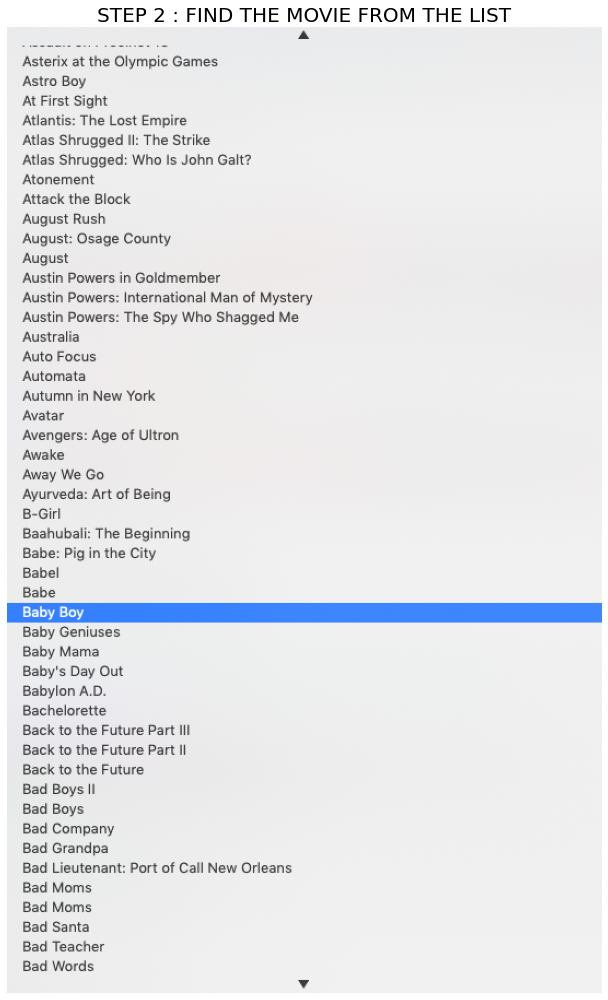

In [179]:
plt.figure(figsize=(20, 14))
img2 = image.imread('2.png')
plt.imshow(img2)
plt.axis('off')
plt.title('STEP 2 : FIND THE MOVIE FROM THE LIST', fontsize=20)
plt.tight_layout()

### STEP 3

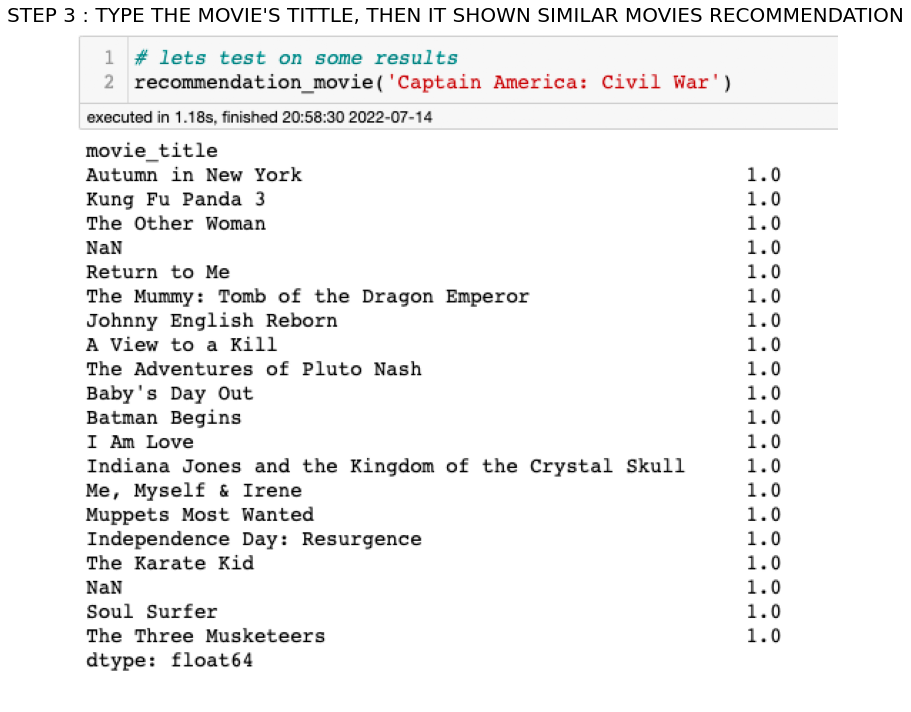

In [182]:
plt.figure(figsize=(15, 10))
img3 = image.imread('3.png')
plt.imshow(img3)
plt.axis('off')
plt.title("STEP 3 : TYPE THE MOVIE'S TITTLE, THEN IT SHOWN SIMILAR MOVIES RECOMMENDATION", fontsize=20)
plt.tight_layout()